# Classifying Player Roles at the 2022 FIFA World Cup Using Machine Learning
Using K-Means Clustering to Discover Tactical Archetypes

**Author:** Fatima Hassan  
**Goal:** Use performance data to classify player types (e.g., playmakers, finishers) using unsupervised machine learning.  
**Dataset:** Aggregated player statistics from the 2022 World Cup  
**Audience:** Sports analysts, scouts, machine learning practitioners


# Introduction

This project uses performance data from the 2022 FIFA World Cup to identify natural player roles based on their style of play. Rather than labeling players manually by position or using predefined categories, we applied machine learning to let the data reveal the groupings.

This approach mimics how forward-thinking organizations like Sportable use player-tracking data and performance analytics to enhance tactical decisions, scouting, and broadcasting insights.



## Import Libraries & Load Data 
Load all required Python libraries for data analysis, modeling, and visualization.


In [4]:
import pandas as pd

# Load CSV files
data = pd.read_csv('data.csv')
player_defense = pd.read_csv('player_defense.csv')
player_gca = pd.read_csv('player_gca.csv')
player_keepers = pd.read_csv('player_keepers.csv')
player_keepersadv = pd.read_csv('player_keepersadv.csv')
player_misc = pd.read_csv('player_misc.csv')
player_passing_types = pd.read_csv('player_passing_types.csv')
player_passing = pd.read_csv('player_passing.csv')
player_playingtime = pd.read_csv('player_playingtime.csv')
player_possession = pd.read_csv('player_possession.csv')
player_shooting = pd.read_csv('player_shooting.csv')
player_stats = pd.read_csv('player_stats.csv')
team_data = pd.read_csv('team_data.csv')


# Explore Data

In [5]:
# Previewing the first few rows
print(data.head())

# Checking available columns
print(data.columns.tolist())


   match dayofweek           match_time      home_team     away_team  home_xg  \
0      1       Sun  2022-11-20 19:00:00          Qatar       Ecuador      0.3   
1      2       Mon  2022-11-21 16:00:00        England       IR Iran      2.1   
2      3       Mon  2022-11-21 19:00:00        Senegal   Netherlands      0.9   
3      4       Mon  2022-11-21 22:00:00  United States         Wales      0.8   
4      5       Tue  2022-11-22 13:00:00      Argentina  Saudi Arabia      2.2   

   away_xg score  attendance                          venue  ...  \
0      1.2   0–2       67372                Al Bayt Stadium  ...   
1      1.4   6–2       45334  Khalifa International Stadium  ...   
2      0.7   0–2       41721             Al Thumama Stadium  ...   
3      1.5   1–1       43418          Ahmed bin Ali Stadium  ...   
4      0.1   1–2       88012          Lusail Iconic Stadium  ...   

  home_clearances away_clearances home_offsides away_offsides home_gks  \
0              18             

In [6]:
player_stats.head()
player_stats.columns.tolist()


['player',
 'position',
 'team',
 'age',
 'club',
 'birth_year',
 'games',
 'games_starts',
 'minutes',
 'minutes_90s',
 'goals',
 'assists',
 'goals_pens',
 'pens_made',
 'pens_att',
 'cards_yellow',
 'cards_red',
 'goals_per90',
 'assists_per90',
 'goals_assists_per90',
 'goals_pens_per90',
 'goals_assists_pens_per90',
 'xg',
 'npxg',
 'xg_assist',
 'npxg_xg_assist',
 'xg_per90',
 'xg_assist_per90',
 'xg_xg_assist_per90',
 'npxg_per90',
 'npxg_xg_assist_per90']

In [7]:
player_passing.head()
player_passing.columns.tolist()


['player',
 'position',
 'team',
 'age',
 'birth_year',
 'minutes_90s',
 'passes_completed',
 'passes',
 'passes_pct',
 'passes_total_distance',
 'passes_progressive_distance',
 'passes_completed_short',
 'passes_short',
 'passes_pct_short',
 'passes_completed_medium',
 'passes_medium',
 'passes_pct_medium',
 'passes_completed_long',
 'passes_long',
 'passes_pct_long',
 'assists',
 'xg_assist',
 'pass_xa',
 'xg_assist_net',
 'assisted_shots',
 'passes_into_final_third',
 'passes_into_penalty_area',
 'crosses_into_penalty_area',
 'progressive_passes']

In [8]:
team_data.head()
team_data.columns.tolist()

['team',
 'players_used',
 'avg_age',
 'possession',
 'games',
 'games_starts',
 'minutes',
 'minutes_90s',
 'goals',
 'assists',
 'goals_pens',
 'pens_made',
 'pens_att',
 'cards_yellow',
 'cards_red',
 'goals_per90',
 'assists_per90',
 'goals_assists_per90',
 'goals_pens_per90',
 'goals_assists_pens_per90',
 'xg',
 'npxg',
 'xg_assist',
 'npxg_xg_assist',
 'xg_per90',
 'xg_assist_per90',
 'xg_xg_assist_per90',
 'npxg_per90',
 'npxg_xg_assist_per90',
 'gk_games',
 'gk_games_starts',
 'gk_minutes',
 'gk_goals_against',
 'gk_goals_against_per90',
 'gk_shots_on_target_against',
 'gk_saves',
 'gk_save_pct',
 'gk_wins',
 'gk_ties',
 'gk_losses',
 'gk_clean_sheets',
 'gk_clean_sheets_pct',
 'gk_pens_att',
 'gk_pens_allowed',
 'gk_pens_saved',
 'gk_pens_missed',
 'gk_pens_save_pct',
 'gk_free_kick_goals_against',
 'gk_corner_kick_goals_against',
 'gk_own_goals_against',
 'gk_psxg',
 'gk_psnpxg_per_shot_on_target_against',
 'gk_psxg_net',
 'gk_psxg_net_per90',
 'gk_passes_completed_launched',

In [9]:
# Previewing structure
for df, name in zip(
    [player_stats, player_passing, player_possession, player_defense, player_shooting],
    ['Stats', 'Passing', 'Possession', 'Defense', 'Shooting']
):
    print(f"\n{name} shape: {df.shape}")
    print(df.head(2))


Stats shape: (680, 31)
         player position       team     age    club  birth_year  games  \
0    Aaron Mooy       MF  Australia  32-094  Celtic        1990      4   
1  Aaron Ramsey       MF      Wales  31-357    Nice        1990      3   

   games_starts  minutes  minutes_90s  ...  goals_assists_pens_per90   xg  \
0             4      360          4.0  ...                       0.0  0.0   
1             3      266          3.0  ...                       0.0  0.0   

   npxg  xg_assist  npxg_xg_assist  xg_per90  xg_assist_per90  \
0   0.0        0.1             0.1      0.01             0.02   
1   0.0        0.0             0.1      0.01             0.01   

   xg_xg_assist_per90  npxg_per90  npxg_xg_assist_per90  
0                0.03        0.01                  0.03  
1                0.02        0.01                  0.02  

[2 rows x 31 columns]

Passing shape: (680, 29)
         player position       team     age  birth_year  minutes_90s  \
0    Aaron Mooy       MF  Aust

# Merge Datasets

In [10]:
# Merge datasets on player + team
df = player_stats.merge(player_passing, on=['player', 'team'], how='inner') \
                 .merge(player_possession, on=['player', 'team'], how='inner') \
                 .merge(player_defense, on=['player', 'team'], how='inner') \
                 .merge(player_shooting, on=['player', 'team'], how='inner')

print(f"Combined dataset shape: {df.shape}")
df.head(2)


Combined dataset shape: (680, 117)


/var/folders/f2/dvtmdjv120z0rqvh420tj_2r0000gn/T/ipykernel_1799/2365978268.py:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'position_x', 'minutes_90s_x', 'age_x', 'birth_year_x'} in the result is deprecated and will raise a MergeError in a future version.
  .merge(player_defense, on=['player', 'team'], how='inner') \


,player,position_x,team,age_x,club,birth_year_x,games,games_starts,minutes,minutes_90s_x,...,goals_per_shot_on_target,average_shot_distance,shots_free_kicks,pens_made_y,pens_att_y,xg_y,npxg_y,npxg_per_shot,xg_net,npxg_net
0,Aaron Mooy,MF,Australia,32-094,Celtic,1990,4,4,360,4.0,...,NaN,29.1,0.0,0,0,0.0,0.0,0.05,0.0,0.0
1,Aaron Ramsey,MF,Wales,31-357,Nice,1990,3,3,266,3.0,...,NaN,18.0,0.0,0,0,0.0,0.0,0.04,0.0,0.0


# Filter Low-Minute Players

## Filter Players by Minutes Played
To ensure reliable statistics, we only keep players who played at least 2 full matches.


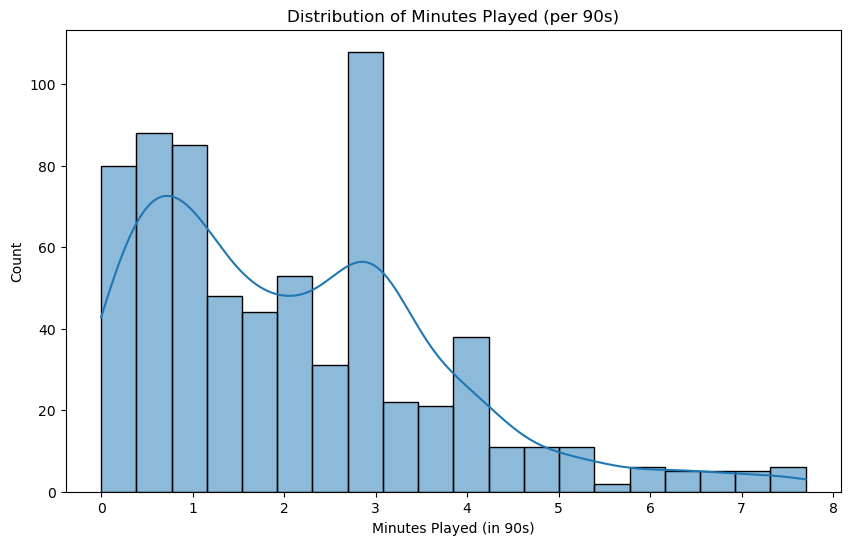

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['minutes_90s'], bins=20, kde=True)
plt.title('Distribution of Minutes Played (per 90s)')
plt.xlabel('Minutes Played (in 90s)')
plt.show()


# Feature Engineering for Player Archetype Modeling

We want to extract meaningful behavioral features from each player — stats that describe how they play, not just how well they performed.


Create per-90-minute features to normalize performance across players.

In [12]:
# Keep only players with at least 2 full matches played
df = df[df['minutes_90s'] >= 2.0].reset_index(drop=True)
print(f"Remaining players: {df.shape[0]}")


Remaining players: 335


In [13]:
finisher_features = ['shots', 'shots_on_target', 'goals', 'xg', 'npxg']
creator_features = ['assists', 'xg_assist', 'passes', 'passes_completed',
                    'passes_total_distance', 'passes_progressive_distance',
                    'progressive_passes']
defender_features = ['tackles', 'interceptions', 'blocks', 'clearances']
features = finisher_features + creator_features + defender_features


In [14]:
# Normalize features per 90 minutes
for col in features:
    if col in df.columns:
        df[col + '_per90'] = df[col] / df['minutes_90s']


In [15]:
feature_cols = [col + '_per90' for col in features if col in df.columns]
X = df[feature_cols].copy()


In [16]:
#We’ll fill any NaNs with 0s for now (a senior modeler might later try mean imputation or flagging missingness):
X = X.fillna(0)


# Feature Scaling


Standardize features to ensure equal contribution to clustering.


In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Unsupervised Player Role Modeling

Group players into similar tactical behavior types based on their normalized per-90 stats (e.g. shots, assists, tackles).

Determine Optimal Number of Clusters (k)
We’ll use the Elbow Method and Silhouette Score to find a good value for k in K-Means.

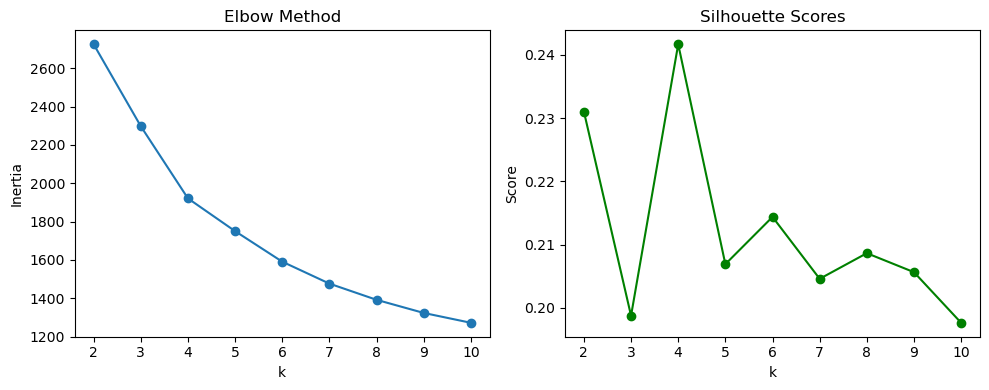

In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

inertias = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Plot Elbow Curve
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('k')
plt.ylabel('Inertia')

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Scores')
plt.xlabel('k')
plt.ylabel('Score')

plt.tight_layout()
plt.show()


In [22]:
optimal_k = 4  # adjust based on the plot results

kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to your main dataframe
df['player_cluster'] = cluster_labels


Analyze Cluster Characteristics



In [23]:
# Reattaching the features with the cluster labels
feature_summary = df.groupby('player_cluster')[feature_cols].mean().round(2)

# Display cluster profiles
feature_summary.T


player_cluster,0,1,2,3
shots_per90,0.03,1.99,0.65,0.60
shots_on_target_per90,0.00,0.77,0.18,0.15
passes_per90,34.39,29.93,75.93,47.01
passes_completed_per90,25.96,21.60,66.58,37.23
passes_total_distance_per90,648.39,320.58,1211.45,633.01
passes_progressive_distance_per90,423.14,74.94,379.70,207.32
progressive_passes_per90,0.24,1.80,4.31,2.32
tackles_per90,0.08,0.92,1.59,1.92
interceptions_per90,0.06,0.34,0.92,1.05
blocks_per90,0.02,0.89,0.97,1.36


In [25]:
# Assigning readable role labels to each cluster
cluster_labels = {
    0: 'Limited Involvement',
    1: 'Finishers',
    2: 'Playmakers',
    3: 'Ball-Winning Defenders'
}

df['role'] = df['player_cluster'].map(cluster_labels)


# Visualize & Interpret Clusters


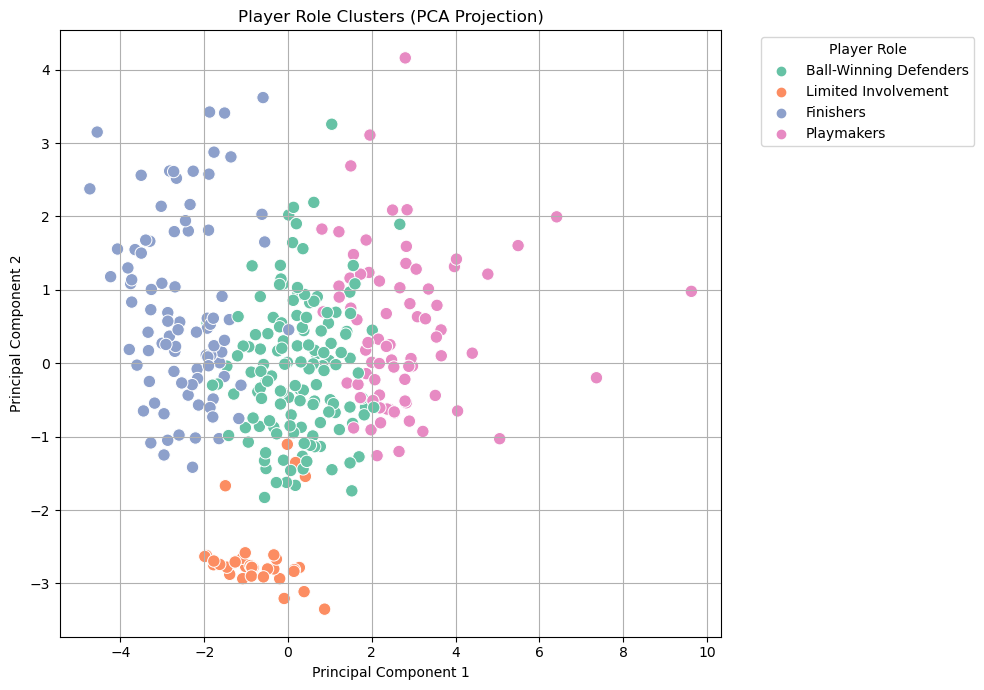

In [26]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Fit PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Creating a DataFrame for visualization
pca_df = pd.DataFrame({
    'PCA1': X_pca[:, 0],
    'PCA2': X_pca[:, 1],
    'role': df['role'],
    'player': df['player'],
    'team': df['team']
})

# Ploting PCA-reduced clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='role', palette='Set2', s=80)
plt.title('Player Role Clusters (PCA Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Player Role', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [27]:
for role in df['role'].unique():
    print(f"\n🔹 Role: {role}")
    display(df[df['role'] == role][['player', 'team', 'position']].head(8))



🔹 Role: Ball-Winning Defenders


,player,team,position
0,Aaron Mooy,Australia,MF
1,Aaron Ramsey,Wales,MF
2,Abdelhamid Sabiri,Morocco,MF
3,Abdelkarim Hassan,Qatar,DF
7,Achraf Dari,Morocco,DF
8,Achraf Hakimi,Morocco,DF
9,Adrien Rabiot,France,MF
10,Ahmad Nourollahi,IR Iran,MF



🔹 Role: Limited Involvement


,player,team,position
4,Abdou Diallo,Senegal,DF
11,Aimen Dahmen,Tunisia,GK
12,Akram Afif,Qatar,FW
20,Alisson,Brazil,GK
27,Andries Noppert,Netherlands,GK
78,Devis Epassy,Cameroon,GK
79,Diogo Costa,Portugal,GK
82,Dominik Livaković,Croatia,GK



🔹 Role: Finishers


,player,team,position
5,Abdulaziz Hatem,Qatar,MF
13,Aleksandar Mitrović,Serbia,FW
16,Alexis Vega,Mexico,FW
22,Almoez Ali,Qatar,FW
23,Alphonso Davies,Canada,MF
26,Andrej Kramarić,Croatia,FW
29,André Ayew,Ghana,MF
45,Boulaye Dia,Senegal,FW



🔹 Role: Playmakers


,player,team,position
6,Abdulelah Al-Amri,Saudi Arabia,DF
14,Alex Sandro,Brazil,DF
25,Andreas Christensen,Denmark,DF
32,Antonio Rüdiger,Germany,DF
33,Aurélien Tchouaméni,France,MF
35,Aymeric Laporte,Spain,DF
41,Ben Davies,Wales,DF
42,Bernardo Silva,Portugal,MF


In [28]:
summary_table = df.groupby('role')[feature_cols].mean().round(2)
summary_table.to_csv('role_profiles_summary.csv')


# Conclusion

This project demonstrates the power of machine learning in sports analytics — not to predict the future, but to understand the present more clearly. By clustering players based on per-90-minute performance metrics, we were able to uncover natural playing styles without any labels.

The result is a data-driven method to understand player behavior, assess team dynamics, and support smarter, more objective decision-making in football. It’s a model that could be deployed in scouting, tactical planning, or even live-match commentary.

With access to richer real-time data, such as those collected by Sportable’s Smart Ball and player tracking technology, these same methods can evolve into powerful real-time performance insight tools used by elite teams around the world.